In [1]:
#crashes.groupby(['year']).describe()
# crashes.month.value_counts().sort_values()
#plt.hist(crashes.month, bins=12)

import plotly 
plotly.tools.set_credentials_file(username='dantzelevitch', api_key='PJgrq35QH890fKSDKw0A')
import plotly.plotly as py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_rows = 500

In [2]:
scores_individual = pd.read_table('Physician_Compare_2015_Individual_EP_Public_Reporting___Performance_Scores.csv', delimiter=',')
scores_group = pd.read_table('Physician_Compare_2015_Group_Public_Reporting___Performance_Scores.csv', delimiter=',')
patient = pd.read_table('Physician_Compare_2015_Group_Public_Reporting_-_Patient_Experience.csv', delimiter=',')
categories = pd.read_table('categories.txt')


#Merge Data

#Flag scores as Individual or Group
scores_individual['isGroup'] = 'Individual'
scores_group['isGroup'] = 'Group'

#Change header on Group dataFrame to match Individual DataFrame
scores_group.rename(columns={'Group PAC ID' : 'PAC ID'}, inplace=True)

#Merge Individual and Group Scores into single dataframe
scores_merged = pd.merge(scores_group, scores_individual, how='outer')
scores_merged = pd.merge(scores_merged, categories, how='left', on='Measure Identifier')

#Aggregate Patient Scores by Group Provider
patient_score_by_group = patient.groupby(['Group PAC ID']).mean()    #,'Measure Title'])
patient_score_by_group['PAC ID'] = patient_score_by_group.index
patient_score_by_group.rename(columns={'Measure Performance Rate' : 'Patient Satisfaction'}, inplace=True)

#Merge Aggregated patient scores to Master Score DataFrame
patient_score_by_group = patient_score_by_group.drop(['Footnote'], axis=1)
scores_merged = pd.merge(scores_merged, patient_score_by_group, how='left', on='PAC ID')

#print(scores_merged[scores_merged['PAC ID'] == 42124174].head(100))
#Reverse the scores Labeled Inverse = Y
scores_merged.loc[scores_merged['Inverse Measure'] == 'Y' , 'Measure Performance Rate'] =  100 - scores_merged['Measure Performance Rate']

scores_merged = scores_merged.drop(['Footnote','NPI','Reported on PC Live Site'], axis=1)
scores_merged['PAC ID'] = scores_merged['PAC ID'].apply(str)

str()
#print('-------------------------')
#print(scores_merged[scores_merged['PAC ID'] == 42124174].head(100))

scores_merged.head(100)
#scores_merged.dtypes


,Organization legal name or 'doing business as' name,PAC ID,State,Participating in PQRS,Measure Identifier,Measure Title,Inverse Measure,Measure Performance Rate,Reporting Mechanism,isGroup,Last Name,First Name,Category,Type,Patient Satisfaction
0,GLEN BURNIE PHYSICAL THERAPY AND SPORTSCARE LLC,42102592,MD,NaN,PQRS_GRP_131_1,Pain Assessment and Follow-Up,N,99.0,REG,Group,NaN,NaN,Bones,Assessment,NaN
1,GLEN BURNIE PHYSICAL THERAPY AND SPORTSCARE LLC,42102592,MD,NaN,PQRS_GRP_154_1,Falls: Risk Assessment,N,77.0,REG,Group,NaN,NaN,Falls,Assessment,NaN
2,GLEN BURNIE PHYSICAL THERAPY AND SPORTSCARE LLC,42102592,MD,NaN,PQRS_GRP_155_1,Falls: Plan of Care,N,88.0,REG,Group,NaN,NaN,Falls,Treatment,NaN
3,GLEN BURNIE PHYSICAL THERAPY AND SPORTSCARE LLC,42102592,MD,NaN,PQRS_GRP_182_1,Functional Outcome Assessment,N,100.0,REG,Group,NaN,NaN,Preventative Care,Assessment,NaN
4,HERITAGE VALLEY MEDICAL GROUP INC,42105678,PA,Y,PQRS_GRP_110_1,Preventive Care and Screening: Influenza Immun...,N,62.0,WI,Group,NaN,NaN,Flu,Screening,65.875
5,HERITAGE VALLEY MEDICAL GROUP INC,42105678,PA,Y,PQRS_GRP_111_1,Pneumonia Vaccination Status for Older Adults,N,75.0,WI,Group,NaN,NaN,Flu,Vaccination,65.875
6,HERITAGE VALLEY MEDICAL GROUP INC,42105678,PA,Y,PQRS_GRP_112_1,Breast Cancer Screening,N,70.0,WI,Group,NaN,NaN,Cancer,Screening,65.875
7,HERITAGE VALLEY MEDICAL GROUP INC,42105678,PA,Y,PQRS_GRP_113_1,Colorectal Cancer Screening,N,65.0,WI,Group,NaN,NaN,Cancer,Screening,65.875
8,HERITAGE VALLEY MEDICAL GROUP INC,42105678,PA,Y,PQRS_GRP_117_1,Diabetes: Eye Exam,N,55.0,WI,Group,NaN,NaN,Diabetes,Screening,65.875
9,HERITAGE VALLEY MEDICAL GROUP INC,42105678,PA,Y,PQRS_GRP_118_1,Coronary Artery Disease (CAD): Angiotensin-Con...,N,77.0,WI,Group,NaN,NaN,Heart,Treatment,65.875


QCDR - A Qualified Clinical Data Registry - an entity Fed Gov. approve that collects clinicians’ clinical data for submission into Incentive Program

REG - Clinical registries are organized systems that use observational study methods to collect uniform data to evaluate specified outcomes for a population defined by a particular disease, condition, or exposure, and that serve one or more scientific, clinical, or policy purposes.

CLM - Claims

In [3]:
df_category = scores_merged.groupby(['Category'])['Measure Performance Rate'].describe()   #.sort_values(ascending = False)
df_category.sort_values(by=['mean'], ascending=False)



,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
Eyes,21660.0,95.145152,15.976612,0.0,100.0,100.0,100.0,100.0
Surgery,34581.0,95.024753,11.999818,0.0,96.0,100.0,100.0,100.0
Colon,4895.0,93.943207,12.676576,0.0,95.0,99.0,100.0,100.0
Other,2249.0,92.453535,16.067797,0.0,93.0,98.0,100.0,100.0
Preventative Care,111214.0,90.605185,23.066667,0.0,96.0,100.0,100.0,100.0
Falls,6790.0,88.452135,25.888848,0.0,95.0,100.0,100.0,100.0
Radiology,29220.0,88.335113,22.169969,0.0,89.0,98.0,100.0,100.0
Heart,3014.0,86.628401,23.308561,0.0,84.0,98.0,100.0,100.0
Blood Clots,2673.0,84.026188,27.548366,0.0,81.0,100.0,100.0,100.0


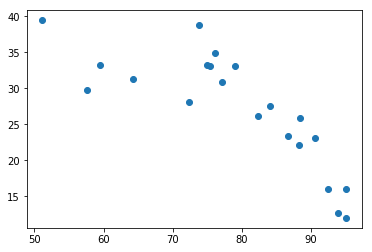

In [4]:
plt.scatter(df_category['mean'],df_category['std'])

In [5]:
df_category = scores_merged.groupby(['Type'])['Measure Performance Rate'].describe()   #.sort_values(ascending = False)
df_category.sort_values(by=['mean'], ascending=False)

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
Documentation,65078.0,93.655306,17.747025,0.0,97.0,100.0,100.0,100.0
Assessment,92963.0,87.424083,27.912210,0.0,96.0,100.0,100.0,100.0
Treatment,121797.0,84.326724,27.453227,0.0,84.0,98.0,100.0,100.0
Screening,206270.0,74.931890,30.377219,0.0,51.0,92.0,100.0,100.0
Vaccination,19980.0,62.866617,27.361319,0.0,42.0,67.0,86.0,100.0


In [6]:
df_category = scores_merged.groupby(['State'])['Measure Performance Rate'].describe()   #.sort_values(ascending = False)
df_category.sort_values(by=['mean'], ascending=False)

,count,mean,std,min,25%,50%,75%,max
State,,,,,,,,
PR,1.0,100.000000,NaN,100.0,100.00,100.0,100.00,100.0
VT,18.0,93.555556,8.658367,75.0,91.00,98.0,100.00,100.0
DC,6.0,92.666667,6.501282,83.0,90.25,91.5,98.00,100.0
WY,44.0,88.318182,18.390813,6.0,82.75,96.5,100.00,100.0
MA,162.0,86.000000,17.880903,14.0,81.00,93.0,100.00,100.0
LA,244.0,82.069672,27.840508,0.0,74.00,98.0,100.00,100.0
ND,56.0,81.767857,19.748409,25.0,70.75,87.5,99.25,100.0
MT,88.0,81.556818,19.237689,25.0,70.00,86.5,99.25,100.0
NY,830.0,81.542169,23.126443,1.0,73.00,90.0,100.00,100.0


In [7]:
scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df_category.index,
        z = df_category['mean'].astype(float),
        locationmode = 'USA-states',
        text = df_category.index,
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Measure Performance Rating")
        ) ]

layout = dict(
        title = 'Physician Measure Performance Rating by State<br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    

fig = dict( data=data, layout=layout )
py.iplot(fig, filename='d3-cloropleth-map')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~dantzelevitch/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'


In [47]:
df_category = scores_merged.groupby(['Reporting Mechanism'])['Measure Performance Rate'].describe()   #.sort_values(ascending = False)
df_category.sort_values(by=['mean'], ascending=False)
#scores_merged.boxplot(['Measure Performance Rate'], by=['Reporting Mechanism'], figsize=[30,10], )

,count,mean,std,min,25%,50%,75%,max
Reporting Mechanism,,,,,,,,
QCDR,8423.0,88.133325,20.970593,0.0,88.0,97.0,99.0,100.0
CLM,424985.0,82.894641,27.859007,0.0,76.0,99.0,100.0,100.0
REG,69248.0,72.200165,33.171550,0.0,52.0,88.0,100.0,100.0
WI,3432.0,68.205128,25.138727,0.0,52.0,74.0,89.0,100.0


,Measure Performance Rate,Patient Satisfaction
count,506088.00000,2705.000000
mean,81.41889,64.985900
std,28.79757,5.019115
min,0.00000,39.000000
25%,72.00000,63.625000
50%,98.00000,65.750000
75%,100.00000,67.375000
max,100.00000,88.200000


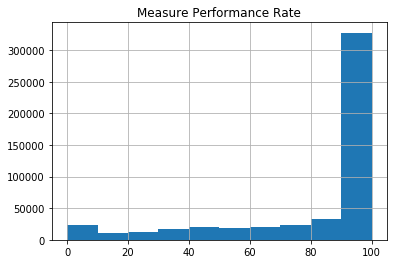

In [39]:
scores_merged = scores_merged.dropna(subset = ['Measure Performance Rate'])


scores_merged.hist(column='Measure Performance Rate')

scores_merged.describe()

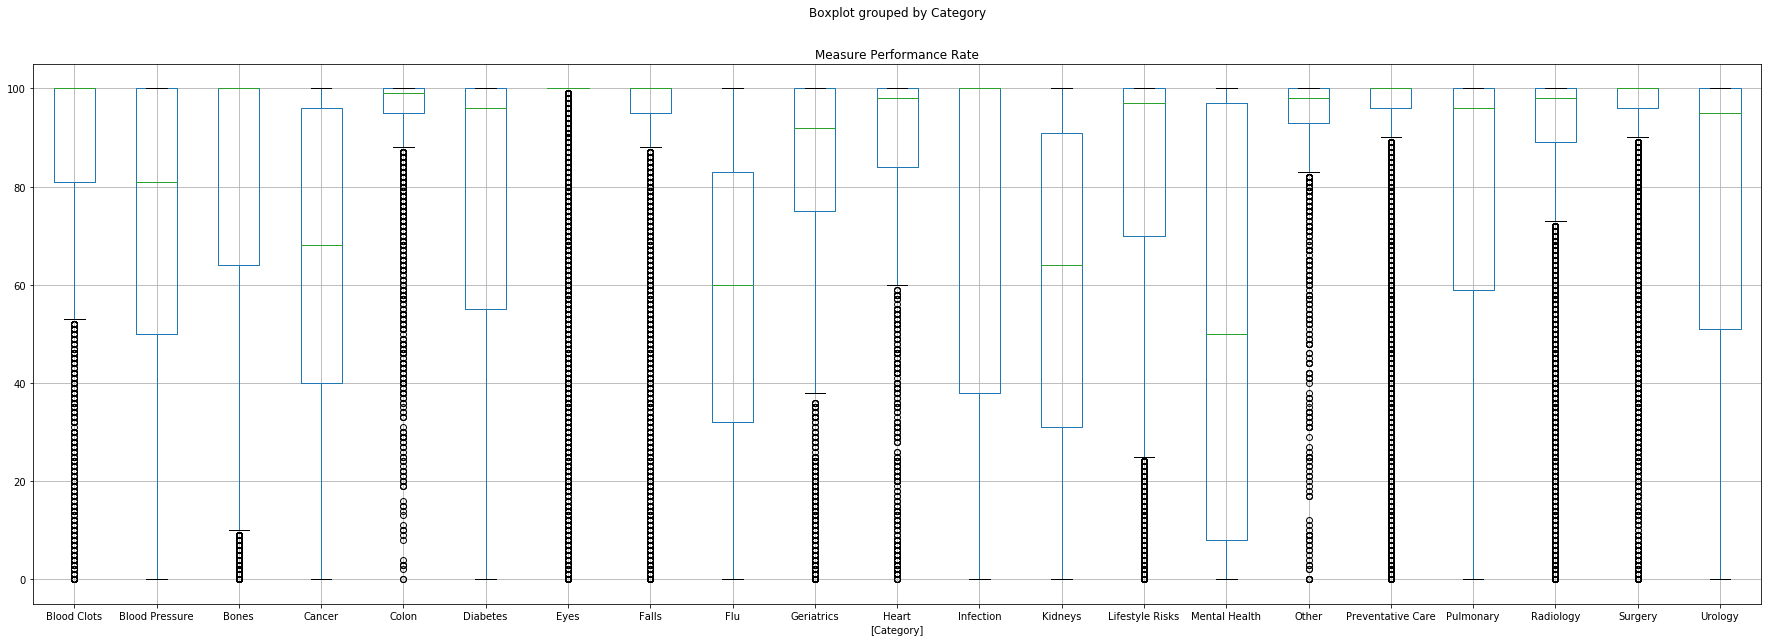

In [10]:
scores_merged.boxplot(['Measure Performance Rate'], by=['Category'], figsize=[30,10], )

In [11]:
#create new DF where patient satisfaction is populated
scores_merged_with_patient = scores_merged.loc[np.isnan(scores_merged['Patient Satisfaction']) == False]

scores_merged_with_patient['Diff'] = scores_merged_with_patient['Measure Performance Rate'] - scores_merged_with_patient['Patient Satisfaction']

scores_merged_with_patient

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,Organization legal name or 'doing business as' name,PAC ID,State,Participating in PQRS,Measure Identifier,Measure Title,Inverse Measure,Measure Performance Rate,Reporting Mechanism,isGroup,Last Name,First Name,Category,Type,Patient Satisfaction,Diff
4,HERITAGE VALLEY MEDICAL GROUP INC,42105678,PA,Y,PQRS_GRP_110_1,Preventive Care and Screening: Influenza Immun...,N,62.0,WI,Group,NaN,NaN,Flu,Screening,65.875000,-3.875000
5,HERITAGE VALLEY MEDICAL GROUP INC,42105678,PA,Y,PQRS_GRP_111_1,Pneumonia Vaccination Status for Older Adults,N,75.0,WI,Group,NaN,NaN,Flu,Vaccination,65.875000,9.125000
6,HERITAGE VALLEY MEDICAL GROUP INC,42105678,PA,Y,PQRS_GRP_112_1,Breast Cancer Screening,N,70.0,WI,Group,NaN,NaN,Cancer,Screening,65.875000,4.125000
7,HERITAGE VALLEY MEDICAL GROUP INC,42105678,PA,Y,PQRS_GRP_113_1,Colorectal Cancer Screening,N,65.0,WI,Group,NaN,NaN,Cancer,Screening,65.875000,-0.875000
8,HERITAGE VALLEY MEDICAL GROUP INC,42105678,PA,Y,PQRS_GRP_117_1,Diabetes: Eye Exam,N,55.0,WI,Group,NaN,NaN,Diabetes,Screening,65.875000,-10.875000
9,HERITAGE VALLEY MEDICAL GROUP INC,42105678,PA,Y,PQRS_GRP_118_1,Coronary Artery Disease (CAD): Angiotensin-Con...,N,77.0,WI,Group,NaN,NaN,Heart,Treatment,65.875000,11.125000
10,HERITAGE VALLEY MEDICAL GROUP INC,42105678,PA,Y,PQRS_GRP_128_1,Preventive Care and Screening: Body Mass Index...,N,45.0,WI,Group,NaN,NaN,Lifestyle Risks,Screening,65.875000,-20.875000
11,HERITAGE VALLEY MEDICAL GROUP INC,42105678,PA,Y,PQRS_GRP_130_1,Documentation of Current Medications in the Me...,N,71.0,WI,Group,NaN,NaN,Preventative Care,Documentation,65.875000,5.125000
12,HERITAGE VALLEY MEDICAL GROUP INC,42105678,PA,Y,PQRS_GRP_134_1,Preventive Care and Screening: Screening for C...,N,9.0,WI,Group,NaN,NaN,Mental Health,Screening,65.875000,-56.875000
13,HERITAGE VALLEY MEDICAL GROUP INC,42105678,PA,Y,PQRS_GRP_204_1,Ischemic Vascular Disease (IVD): Use of Aspiri...,N,82.0,WI,Group,NaN,NaN,Blood Clots,Treatment,65.875000,16.125000


In [12]:
df_summary_with_patients = scores_merged_with_patient.groupby(['State'])['Diff'].describe()   #.sort_values(ascending = False)
df_summary_with_patients.sort_values(by=['mean'], ascending=False)



,count,mean,std,min,25%,50%,75%,max
State,,,,,,,,
LA,8.0,44.275000,0.353553,43.400000,44.400000,44.400000,44.400000,44.400000
NV,3.0,37.750000,13.527749,24.750000,30.750000,36.750000,44.250000,51.750000
AR,5.0,25.500000,22.296125,-14.375000,34.625000,35.750000,35.750000,35.750000
MD,8.0,23.625000,16.361568,-10.375000,22.093750,27.000000,30.125000,46.000000
DC,1.0,22.625000,NaN,22.625000,22.625000,22.625000,22.625000,22.625000
AZ,34.0,22.058824,28.320991,-55.500000,-1.750000,38.250000,44.208333,49.666667
MI,53.0,18.678774,27.533967,-53.750000,0.250000,28.250000,35.750000,61.000000
OK,36.0,15.406250,27.024053,-56.500000,-2.218750,23.250000,35.312500,51.250000
ND,42.0,14.744048,19.635187,-39.857143,6.750000,19.133929,31.794643,36.750000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x136365d30>]],
      dtype=object)

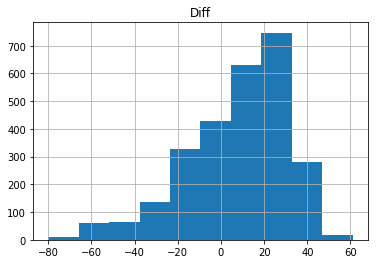

In [42]:
#scores_merged_with_patient.describe()
scores_merged_with_patient.hist(['Diff'])

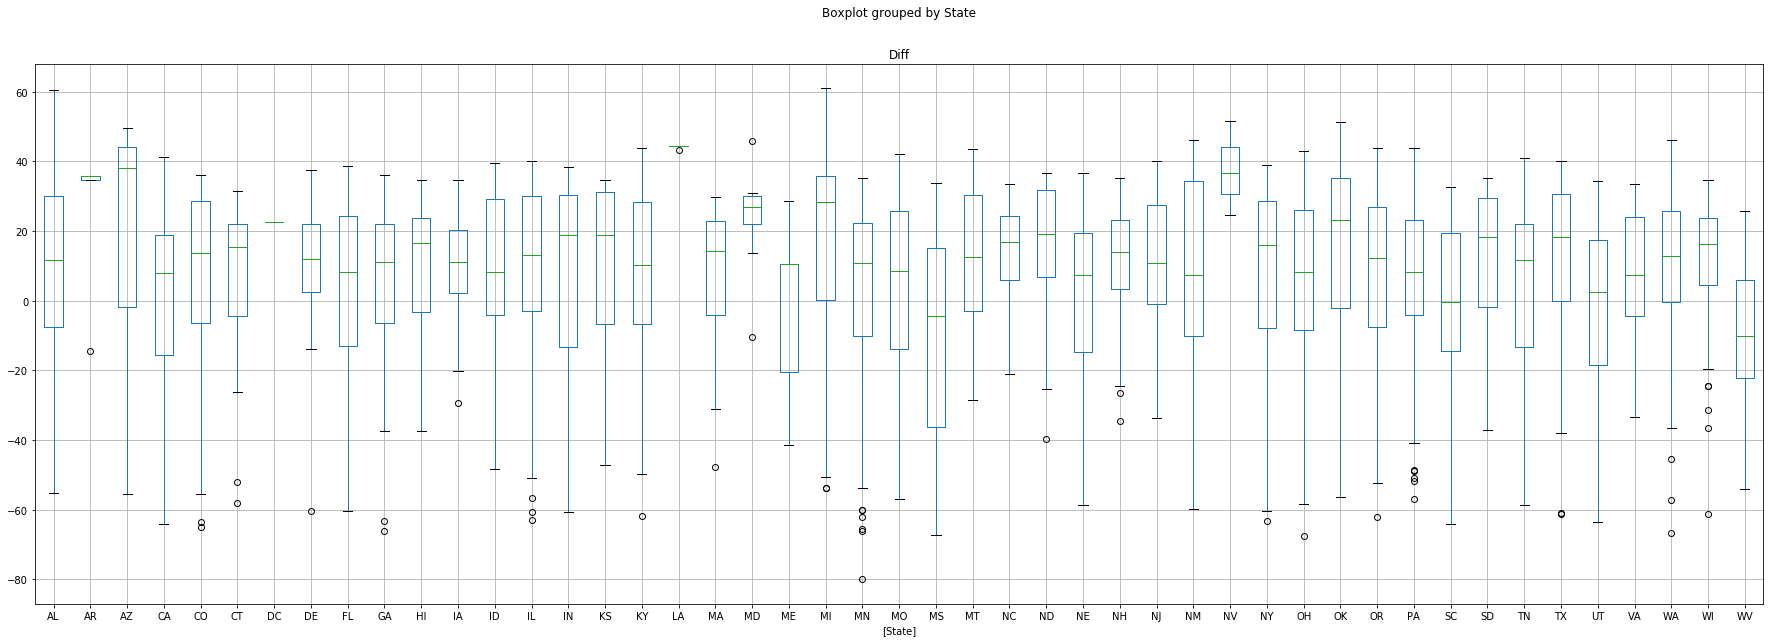

In [14]:
scores_merged_with_patient.boxplot(['Diff'], by=['State'], figsize=[30,10])

In [15]:
df_category = scores_merged_with_patient.groupby(['State'])['Patient Satisfaction'].describe()   #.sort_values(ascending = False)



scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df_category.index,
        z = df_category['mean'].astype(float),
        locationmode = 'USA-states',
        text = df_category.index,
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Measure Performance Rating")
        ) ]

layout = dict(
        title = 'Physician Measure Performance Rating by State<br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    

fig = dict( data=data, layout=layout )
py.iplot(fig, filename='d3-cloropleth-map')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~dantzelevitch/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'


In [16]:
df_category = scores_merged_with_patient.groupby(["Organization legal name or 'doing business as' name"])['Diff'].describe()


df_category.sort_values(['mean'], ascending = False)


,count,mean,std,min,25%,50%,75%,max
Organization legal name or 'doing business as' name,,,,,,,,
AMERICAN FAMILY CARE INC,7.0,52.642857,20.788046,5.500000,60.500000,60.500000,60.500000,60.500000
WHC PHYSICIAN GROUP LLC,1.0,46.000000,NaN,46.000000,46.000000,46.000000,46.000000,46.000000
LOUISIANA STATE UNIVERSITY SCHOOL OF MEDICINE IN NEW ORLEANS FACULTY G,8.0,44.275000,0.353553,43.400000,44.400000,44.400000,44.400000,44.400000
NORTHWEST ALLIED PHYSICIANS LLC,8.0,44.250000,2.100170,40.375000,44.375000,45.375000,45.375000,45.375000
PIKEVILLE MEDICAL CENTER INC,4.0,43.833333,0.000000,43.833333,43.833333,43.833333,43.833333,43.833333
ASANTE PHYSICIAN PARTNERS,5.0,43.833333,0.000000,43.833333,43.833333,43.833333,43.833333,43.833333
"RECONSTRUCTIVE ORTHOPAEDIC ASSOCIATES II, P.C.",1.0,43.750000,NaN,43.750000,43.750000,43.750000,43.750000,43.750000
"GENESIS MEDICAL GROUP, LLC",2.0,43.000000,0.000000,43.000000,43.000000,43.000000,43.000000,43.000000
BANNER UNIVERSITY MEDICAL GROUP,6.0,42.333333,1.224745,39.833333,42.833333,42.833333,42.833333,42.833333


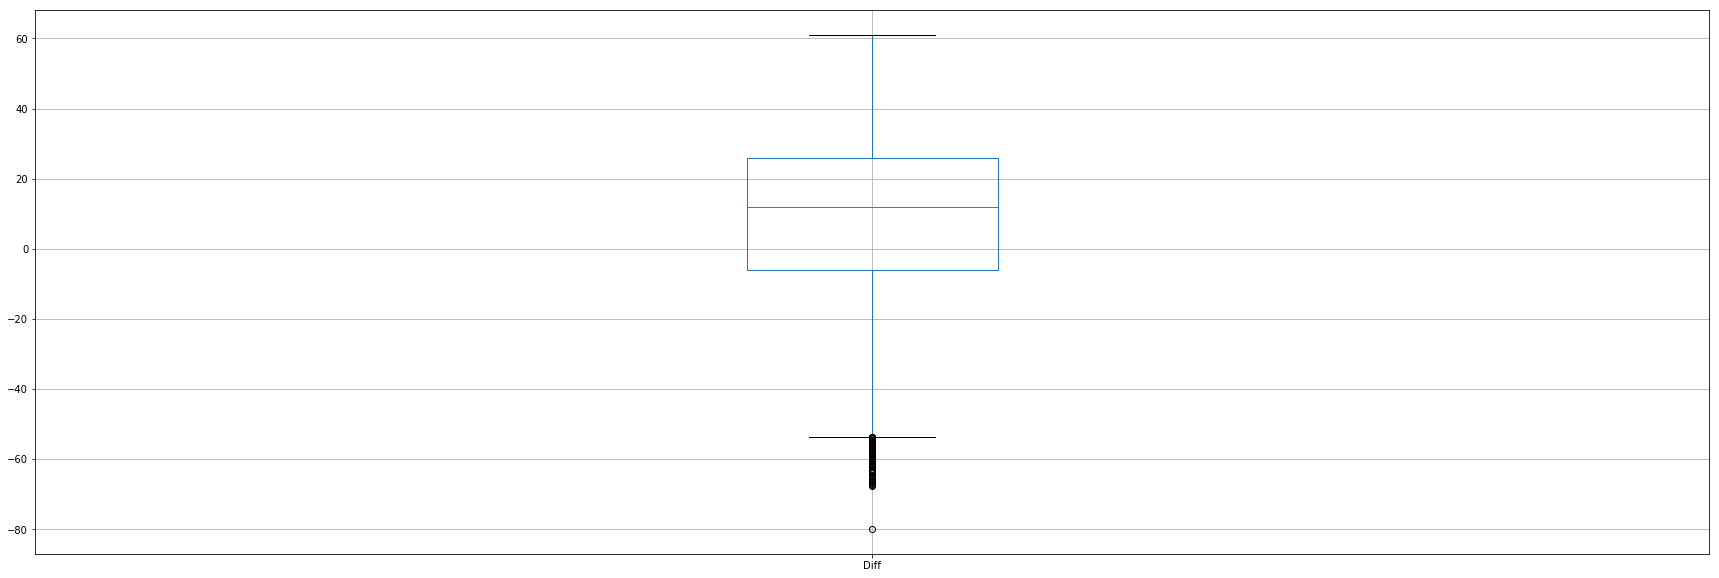

In [17]:
scores_merged_with_patient.boxplot(['Diff'], figsize=[30,10])

In [18]:

df_category = patient.groupby(["Measure Title"])['Measure Performance Rate'].describe()

df_category.sort_values(['mean'], ascending = False)

,count,mean,std,min,25%,50%,75%,max
Measure Title,,,,,,,,
How well clinicians communicate.,363.0,82.815427,3.272451,69.0,81.0,83.0,85.0,93.0
Courteous and helpful office staff.,395.0,81.602532,4.403678,64.0,79.0,82.0,85.0,95.0
Patients' rating of clinicians.,379.0,80.527704,4.326753,63.0,78.0,81.0,83.0,92.0
Clinicians working together for your care.,395.0,75.205063,3.488338,61.0,73.0,75.0,77.0,88.0
Health promotion and education.,408.0,60.083333,4.703798,46.0,57.0,61.0,63.0,73.0
"Getting timely care, appointments, and information.",390.0,59.346154,6.482381,34.0,56.0,60.0,63.0,82.0
Between visit communication.,395.0,58.007595,7.420471,35.0,53.0,58.0,63.0,87.0
Attention to patient medication cost.,396.0,26.378788,5.250963,6.0,23.0,26.0,30.0,43.0


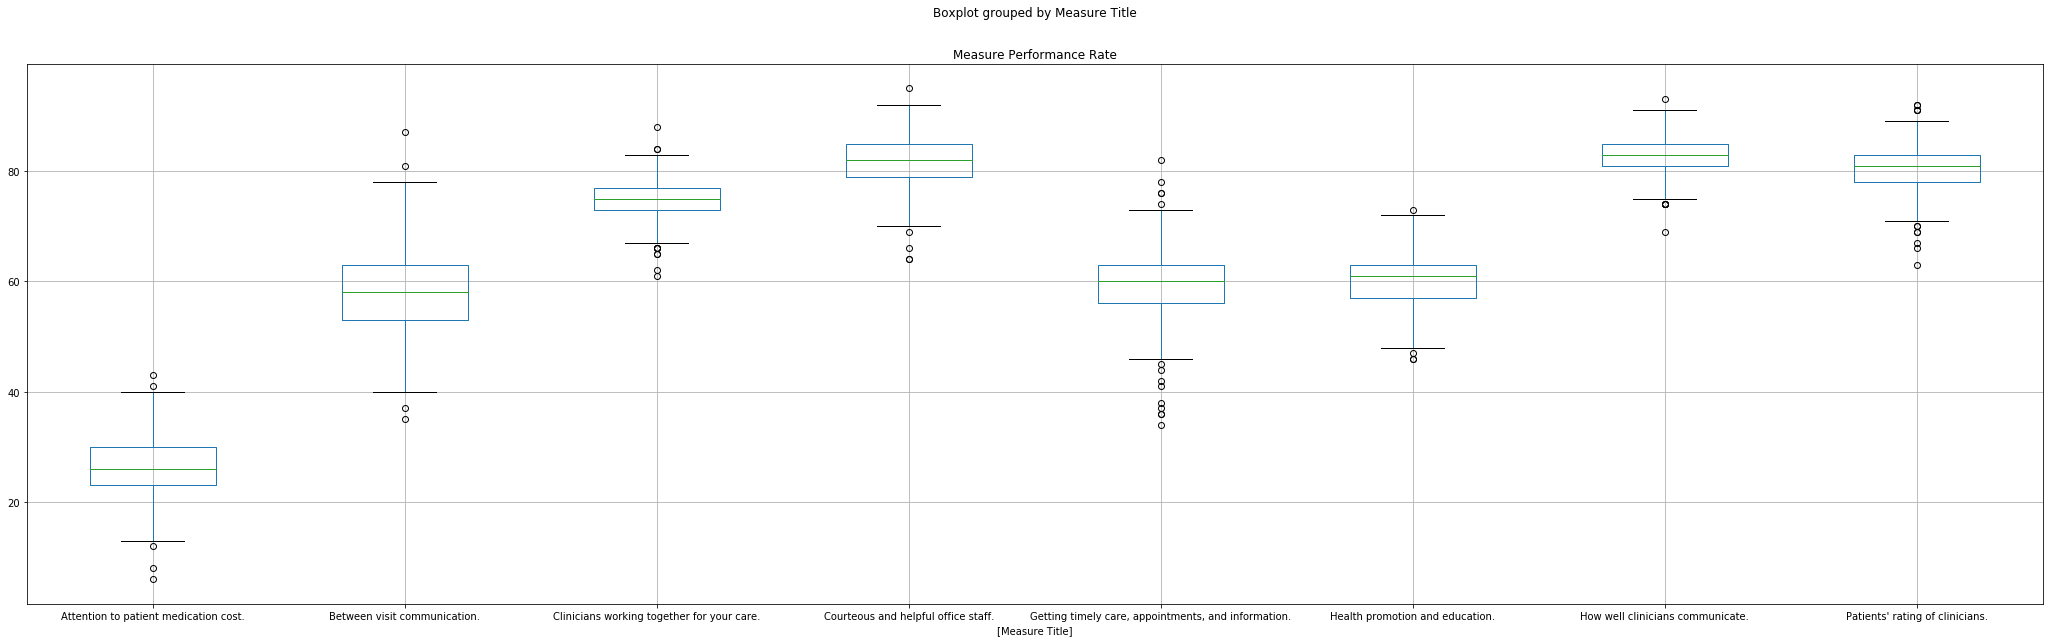

In [19]:
patient.boxplot(['Measure Performance Rate'], by=['Measure Title'], figsize=[35,10])

In [43]:
orgs = scores_merged['PAC ID'].value_counts()
orgs.describe()


count    183094.000000
mean          2.764088
std           2.250648
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max          32.000000
Name: PAC ID, dtype: float64